<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: center; background-color:rgb(18, 135, 198); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents </b></h3>
    
- I. Crawling Data and Merging Datasets
- II. Exploring and Pre-processing Data
    - [2.1. Basic infomation](#2.1)
        - [2.1.1. Shape of data](#2.1.1)
        - [2.1.2. Meaning of each row](#2.1.2)
        - [2.1.3. Meaning of each column](#2.1.3)
        - [2.1.4. Check duplicate](#2.1.4)
        - [2.1.5. Data type of each column (standardize if necessary)](#2.1.5)
        - [2.1.6. Missing values of each column](#2.1.6)
    - [2.2 Data distribution](#2.2)
    - [2.3. Abnormal values and outliers](#2.3)
    - [2.4. Correlation between variables](#2.4)
- III. Asking meaningful questions
    - [3.1. Question 1](#3.1)
        - [3.1.1. Preprocessing](#3.1.1)
        - [3.1.2. Analysis](#3.1.2)
        - [3.1.3. Conclusion](#3.1.3)
    - [3.2. Question 2](#3.2)
        - [3.2.1. Preprocessing](#3.2.1)
        - [3.2.2. Analysis](#3.2.2)
        - [3.2.3. Conclusion](#3.2.3)
    - [3.3. Question 3](#3.3)
        - [3.3.1. Preprocessing](#3.3.1)
        - [3.3.2. Analysis](#3.3.2)
        - [3.3.3. Conclusion](#3.3.3)

    - [3.4. Question 4](#3.4)
        - [3.4.1. Preprocessing](#3.4.1)
        - [3.4.2. Analysis](#3.4.2)
        - [3.4.3. Conclusion](#3.4.3)
    - [3.5. Question 5](#3.5)
        - [3.5.1. Preprocessing](#3.5.1)
        - [3.5.2. Analysis](#3.5.2)
        - [3.5.3. Conclusion](#3.5.3)
    - [3.6. Question 6](#3.6)
        - [3.6.1. Preprocessing](#3.6.1)
        - [3.6.2. Analysis](#3.6.2)
        - [3.6.3. Conclusion](#3.6.3)
- IV. References

In [13]:
from IPython.display import display
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
import os

import urllib.robotparser

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: center; background-color:rgb(2, 100, 153); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>1. Crawling Data and Merging Datasets </b></h3>

<a class="anchor" id="1.1."></a>
<h4 style="text-align: left; background-color:rgb(36, 138, 193); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>1.1. Helper functions </b></h4>

In [323]:
BASE_URL = 'http://api.worldbank.org/v2/'

INDICATOR_CODES = [
    "SP.POP.TOTL",
    "SP.POP.TOTL.FE.IN",
    "SP.POP.TOTL.MA.IN",
    "SP.DYN.CBRT.IN",
    "SP.DYN.CDRT.IN",
    "SE.COM.DURS",
    "SL.IND.EMPL.ZS",
    "SL.AGR.EMPL.ZS",
    "SL.SRV.EMPL.ZS",
    "SL.AGR.EMPL.FE.ZS",
    "SL.IND.EMPL.FE.ZS",
    "SL.SRV.EMPL.FE.ZS",
    "SL.UEM.TOTL.ZS",
    "SL.UEM.TOTL.FE.ZS",
    "NY.GDP.MKTP.CD",
    "NY.ADJ.NNTY.PC.KD.ZG",
    "NY.GSR.NFCY.CD",
    "NV.AGR.TOTL.CD",
    "NV.AGR.TOTL.ZS",
    "NV.IND.TOTL.ZS",
    "NV.SRV.TOTL.ZS",
    "GC.XPN.TOTL.GD.ZS",
    "NY.GDP.PCAP.CD",
    "NY.GDP.MKTP.KD.ZG",
    "BX.KLT.DINV.CD.WD",
    "NE.EXP.GNFS.ZS",
    "NE.IMP.GNFS.ZS",
    "SP.DYN.LE00.MA.IN",
    "SP.DYN.LE00.FE.IN",
    "FP.CPI.TOTL.ZG",
]

features_mapping = {
    "SP.POP.TOTL": "Total Population",
    "SP.POP.TOTL.FE.IN": "Female Population",
    "SP.POP.TOTL.MA.IN": "Male Population",
    "SP.DYN.CBRT.IN": "Birth Rate",
    "SP.DYN.CDRT.IN": "Death Rate",
    "SE.COM.DURS": "Compulsory Education Dur.",
    "SL.IND.EMPL.ZS": "Employment in Industry(%)",
    "SL.AGR.EMPL.ZS": "Employment in Agriculture(%)",
    "SL.SRV.EMPL.ZS": "Employment in Services(%)",
    "SL.AGR.EMPL.FE.ZS": "Female Employment in Agriculture(%)",
    "SL.IND.EMPL.FE.ZS": "Female Employment in Industry(%)",
    "SL.SRV.EMPL.FE.ZS" : "Female Employment in Services(%)",
    "SL.UEM.TOTL.ZS": "Unemployment(%)",
    "SL.UEM.TOTL.FE.ZS" : "Female Unemployment(%)",
    "NY.GDP.MKTP.CD": "GDP in USD",
    "NY.ADJ.NNTY.PC.KD.ZG": "National Income per Capita",
    "NY.GSR.NFCY.CD": "Net income from Abroad",
    "NV.AGR.TOTL.CD": "Agriculture value added(in USD)",
    "NV.AGR.TOTL.ZS" : "Agriculture value added(%)",
    "NV.IND.TOTL.ZS" : "Industry value added(%)",
    "NV.SRV.TOTL.ZS" : "Services value added(%)",
    "GC.XPN.TOTL.GD.ZS" : "Expense(% of GDP)",
    "NY.GDP.PCAP.CD": "GDP per capita",
    "NY.GDP.MKTP.KD.ZG": "GDP growth rate",
    "BX.KLT.DINV.CD.WD": "Foreign Direct Investment",
    "NE.EXP.GNFS.ZS": "Exports of goods and services",
    "NE.IMP.GNFS.ZS": "Imports of goods and services",
    "SP.DYN.LE00.MA.IN": "Male life expectancy",
    "SP.DYN.LE00.FE.IN": "Female life expectancy",
    "FP.CPI.TOTL.ZG" : "Inflation rate",
}

In [324]:
def loadData(country_code: str, format: str = "json", per_page: int = 100, year_interval: str = '2015:2022') -> List:
    result_data = []
    
    year_start = int(year_interval.split(":")[0])
    year_end = int(year_interval.split(":")[1])
    
    for indicator in INDICATOR_CODES:
        indicators = []
        url = f"{BASE_URL}country/{country_code}/indicator/{indicator}?format=json&per_page={per_page}&date={year_interval}"
        response = requests.get(url)
        print(url)
        
        if response.status_code == 200 and "message" not in response.json()[0].keys():
            data = response.json()[1]
            for item in data:
                value = item['value']
                indicators.append(float(value) if value is not None else np.nan)
        else:
            indicators.extend([np.nan] * (year_end - year_start + 1))  # Extend with NaNs if no data
    
        result_data.append(indicators)
    
    # Add the year range in descending order as integers
    result_data.append(list(range(year_end, year_start - 1, -1)))

    return result_data

In [325]:
def loadDataCountry(country_code: str, format: str = "json", per_page: int = 100, year_interval: str = '2015:2022', is_display: bool = False) -> pd.DataFrame:
    df_country_code = pd.read_csv("data/all_countries.csv")
    df_country_code = df_country_code.fillna("NA")
    COUNTRIES_MAPPING = dict(zip(df_country_code["iso2Code"], df_country_code["name"]))
    del df_country_code

    col_list = list(features_mapping.values()) + ['Year']
    print(f"Loading data for {COUNTRIES_MAPPING[country_code]}")

    dataLst = loadData(country_code=country_code, format=format, per_page=per_page, year_interval=year_interval)

    # Ensure all lists have the same length
    max_len = max(len(arr) for arr in dataLst)
    dataLst_padded = [
        np.pad(
            np.array([x if x is not None else np.nan for x in arr], dtype=float),
            (0, max_len - len(arr)),
            constant_values=np.nan
        )
        for arr in dataLst
    ]

    df = pd.DataFrame(np.column_stack(dataLst), columns=col_list)
    df['Country'] = COUNTRIES_MAPPING[country_code]

    if is_display:
        display(df.head())

    return df

In [326]:
def replacer(s, newstring, index, nofail=False):
    if not nofail and index not in range(len(s)):
        raise ValueError("index outside given string")
    if index < 0:  # add it to the beginning
        return newstring + s
    if index > len(s):  # add it to the end
        return s + newstring
    return s[:index] + newstring + s[index + 1:]

In [327]:
def loadDataContinent(format: str = "json", per_page: int = 100, year_interval: str = '2015:2022', is_display: bool = False) -> pd.DataFrame:
    df_country_code = pd.read_csv("data/asian_countries.csv")
    lst_country_codes = df_country_code["iso2Code"].to_list()

    df = pd.DataFrame()
    for country_code in lst_country_codes:
        df = pd.concat([df, loadDataCountry(
            country_code=country_code,
            format=format,
            per_page=per_page,
            year_interval=year_interval,
            is_display=False)], axis=0)

    if is_display:
        display(df.head())

    return df

In [328]:
def saveDataFrame2CSV(df: pd.DataFrame, save_path: str, sep: str = ',', encoding: str = 'utf-8') -> bool:
    try:
        df.to_csv(save_path, sep=sep, encoding=encoding, index=False)
    except:
        raise ModuleNotFoundError
        # return False
    return True

In [329]:
years = '2000:2023'

<a class="anchor" id="1.2."></a>
<h4 style="text-align: left; background-color:rgb(36, 138, 193); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>1.2. Get all countries </b></h4>

In [330]:
url_countries = f"{BASE_URL}country?format=json&per_page=500"
response = requests.get(url_countries)
countries = []
if response.status_code == 200:
    data = response.json()
    if len(data) > 1 and isinstance(data[1], list):  # Check if data exists
        countries = [
            {
                "name": country["name"],
                "iso2Code": country["iso2Code"],
                "iso3Code": country["id"],
                "region": country["region"]["value"]
            }
            for country in data[1]
        ]
        print(f"Fetched {len(countries)} countries.")
    else:
        print("No country data found.")
else:
    print(f"Error fetching data: {response.status_code}")

print(countries[:5])


Fetched 296 countries.
[{'name': 'Aruba', 'iso2Code': 'AW', 'iso3Code': 'ABW', 'region': 'Latin America & Caribbean '}, {'name': 'Africa Eastern and Southern', 'iso2Code': 'ZH', 'iso3Code': 'AFE', 'region': 'Aggregates'}, {'name': 'Afghanistan', 'iso2Code': 'AF', 'iso3Code': 'AFG', 'region': 'South Asia'}, {'name': 'Africa', 'iso2Code': 'A9', 'iso3Code': 'AFR', 'region': 'Aggregates'}, {'name': 'Africa Western and Central', 'iso2Code': 'ZI', 'iso3Code': 'AFW', 'region': 'Aggregates'}]


In [331]:
countries_df = pd.DataFrame(countries)
countries_df.to_csv("data/all_countries.csv", index=False)

<a class="anchor" id="1.1."></a>
<h4 style="text-align: left; background-color:rgb(36, 138, 193); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>1.3. Get Asian and European countries </b></h4>

In [ ]:
countries_df = pd.read_csv("data/all_countries.csv")

# Get all countries in Asia and Europe
asian_europe_countries = countries_df[countries_df["region"].str.contains("Asia|Europe")]
asian_europe_countries.to_csv("data/asian_european_countries.csv", index=False)


In [334]:
df = loadDataContinent(year_interval=years, is_display=True)
df

Loading data for Afghanistan
http://api.worldbank.org/v2/country/AF/indicator/SP.POP.TOTL?format=json&per_page=100&date=2000:2023
http://api.worldbank.org/v2/country/AF/indicator/SP.POP.TOTL.FE.IN?format=json&per_page=100&date=2000:2023
http://api.worldbank.org/v2/country/AF/indicator/SP.POP.TOTL.MA.IN?format=json&per_page=100&date=2000:2023
http://api.worldbank.org/v2/country/AF/indicator/SP.DYN.CBRT.IN?format=json&per_page=100&date=2000:2023
http://api.worldbank.org/v2/country/AF/indicator/SP.DYN.CDRT.IN?format=json&per_page=100&date=2000:2023
http://api.worldbank.org/v2/country/AF/indicator/SE.COM.DURS?format=json&per_page=100&date=2000:2023
http://api.worldbank.org/v2/country/AF/indicator/SL.IND.EMPL.ZS?format=json&per_page=100&date=2000:2023
http://api.worldbank.org/v2/country/AF/indicator/SL.AGR.EMPL.ZS?format=json&per_page=100&date=2000:2023
http://api.worldbank.org/v2/country/AF/indicator/SL.SRV.EMPL.ZS?format=json&per_page=100&date=2000:2023
http://api.worldbank.org/v2/country

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Employment in Services(%),Female Employment in Agriculture(%),...,GDP per capita,GDP growth rate,Foreign Direct Investment,Exports of goods and services,Imports of goods and services,Male life expectancy,Female life expectancy,Inflation rate,Year,Country
0,41454761.0,20530683.0,20924078.0,NaN,NaN,9.0,18.386784,45.463952,36.149276,47.417946,...,415.707417,2.710887,NaN,16.775136,50.498207,NaN,NaN,NaN,2023.0,Afghanistan
1,40578842.0,20103167.0,20475675.0,35.143,6.906,9.0,18.540741,45.592654,35.866618,47.846236,...,357.261153,-6.240172,NaN,18.380042,54.505427,59.766,66.213,NaN,2022.0,Afghanistan
2,40000412.0,19813956.0,20186456.0,35.842,7.344,9.0,18.522262,45.955199,35.522526,53.755655,...,356.496214,-20.738839,3.079096e+07,14.342153,37.069564,58.915,65.279,NaN,2021.0,Afghanistan
3,39068979.0,19343529.0,19725450.0,36.051,7.113,9.0,18.481312,45.983411,35.535277,53.835873,...,510.787063,-2.351101,1.297015e+07,10.420817,36.289077,59.866,65.432,NaN,2020.0,Afghanistan
4,37856121.0,18736474.0,19119647.0,36.466,6.791,9.0,18.214766,45.050959,36.734276,58.510279,...,496.602504,3.911603,2.340455e+07,NaN,NaN,60.619,66.677,2.302373,2019.0,Afghanistan


,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Employment in Services(%),Female Employment in Agriculture(%),...,GDP per capita,GDP growth rate,Foreign Direct Investment,Exports of goods and services,Imports of goods and services,Male life expectancy,Female life expectancy,Inflation rate,Year,Country
0,41454761.0,20530683.0,20924078.0,NaN,NaN,9.0,18.386784,45.463952,36.149276,47.417946,...,415.707417,2.710887,NaN,16.775136,50.498207,NaN,NaN,NaN,2023.0,Afghanistan
1,40578842.0,20103167.0,20475675.0,35.143,6.906,9.0,18.540741,45.592654,35.866618,47.846236,...,357.261153,-6.240172,NaN,18.380042,54.505427,59.766,66.213,NaN,2022.0,Afghanistan
2,40000412.0,19813956.0,20186456.0,35.842,7.344,9.0,18.522262,45.955199,35.522526,53.755655,...,356.496214,-20.738839,3.079096e+07,14.342153,37.069564,58.915,65.279,NaN,2021.0,Afghanistan
3,39068979.0,19343529.0,19725450.0,36.051,7.113,9.0,18.481312,45.983411,35.535277,53.835873,...,510.787063,-2.351101,1.297015e+07,10.420817,36.289077,59.866,65.432,NaN,2020.0,Afghanistan
4,37856121.0,18736474.0,19119647.0,36.466,6.791,9.0,18.214766,45.050959,36.734276,58.510279,...,496.602504,3.911603,2.340455e+07,NaN,NaN,60.619,66.677,2.302373,2019.0,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,1822773.0,910228.0,912545.0,17.781,5.032,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.338531e+07,NaN,NaN,73.663,76.962,-1.064727,2004.0,Kosovo
20,1826434.0,909898.0,916536.0,15.749,5.021,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,73.311,76.639,-1.084813,2003.0,Kosovo
21,1829462.0,909376.0,920086.0,16.858,5.014,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,73.045,76.312,NaN,2002.0,Kosovo
22,1820009.0,903646.0,916363.0,17.249,4.992,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,72.689,76.109,NaN,2001.0,Kosovo


In [ ]:
df.to_csv("data/asian_european_countries_data.csv", index=False)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: center; background-color:rgb(2, 100, 153); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2. Exploring and Pre-processing Data </b></h3>

<a class="anchor" id="2.1"></a>
<h4 style="text-align: left; background-color:rgb(36, 138, 193); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1. Basic information </b></h4>

<a class="anchor" id="2.1.1"></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.1. Shape of data </b></h5>

In [2]:
raw_df = pd.read_csv("data/asian_european_countries_data.csv")
print(f"The dataset has {raw_df.shape[0]} rows and {raw_df.shape[1]} columns.")
raw_df.head()

The dataset has 2472 rows and 32 columns.


,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Employment in Services(%),Female Employment in Agriculture(%),...,GDP per capita,GDP growth rate,Foreign Direct Investment,Exports of goods and services,Imports of goods and services,Male life expectancy,Female life expectancy,Inflation rate,Year,Country
0,41454761.0,20530683.0,20924078.0,NaN,NaN,9.0,18.386784,45.463952,36.149276,47.417946,...,415.707417,2.710887,NaN,16.775136,50.498207,NaN,NaN,NaN,2023.0,Afghanistan
1,40578842.0,20103167.0,20475675.0,35.143,6.906,9.0,18.540741,45.592654,35.866618,47.846236,...,357.261153,-6.240172,NaN,18.380042,54.505427,59.766,66.213,NaN,2022.0,Afghanistan
2,40000412.0,19813956.0,20186456.0,35.842,7.344,9.0,18.522262,45.955199,35.522526,53.755655,...,356.496214,-20.738839,3.079096e+07,14.342153,37.069564,58.915,65.279,NaN,2021.0,Afghanistan
3,39068979.0,19343529.0,19725450.0,36.051,7.113,9.0,18.481312,45.983411,35.535277,53.835873,...,510.787063,-2.351101,1.297015e+07,10.420817,36.289077,59.866,65.432,NaN,2020.0,Afghanistan
4,37856121.0,18736474.0,19119647.0,36.466,6.791,9.0,18.214766,45.050959,36.734276,58.510279,...,496.602504,3.911603,2.340455e+07,NaN,NaN,60.619,66.677,2.302373,2019.0,Afghanistan


<a class="anchor" id="2.1.2"></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.2. Meaning of each row</b></h5>

Each row represents a country-year record, meaning it provides various `economic`, `demographic`, and `social statistics` for a given country in a specific year.

<a class="anchor" id="2.1.3"></a>

<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.3. Meaning of each column</b></h5>

|**Columns**|**Description**|
|-------|-----------|
|`Total Population` | Total number of people in the country.|
|`Female Population` | Total number of females in the country.|
|`Male Population` | Total number of males in the country.|
|`Birth Rate`|  Number of births per 1,000 people per year.|
|`Death Rate` | Number of deaths per 1,000 people per year.|
|`Compulsory Education Dur.` | Number of years of mandatory education.|
|`Employment in Industry (%)` | Percentage of the workforce employed in industry.|
|`Employment in Agriculture (%)`| Percentage of the workforce employed in agriculture.|
|`Employment in Services (%)` | Percentage of the workforce employed in services.|
|`Female Employment in Agriculture (%)` | Percentage of employed females working in agriculture.|
|`Female Employment in Industry (%)`|  Percentage of employed females working in industry.|
|`Female Employment in Services (%)`| Percentage of employed females working in services.|
|`Unemployment (%)`| Total unemployment rate as a percentage.|
|`Female Unemployment (%)` | Female-specific unemployment rate as a percentage.|
|`GDP in USD`| Gross Domestic Product (GDP) of the country in US dollars.|
|`National Income per Capita`| Average income per person in the country.|
|`Net Income from Abroad` | Net inflow or outflow of income from foreign transactions.|
|`Agriculture Value Added (in USD)`| – Contribution of agriculture to GDP in US dollars.|
|`Agriculture Value Added (%)`|Percentage of GDP coming from agriculture.|
|`Industry Value Added (%)` | Percentage of GDP coming from industry.|
|`Services Value Added (%)`| Percentage of GDP coming from services.|
|`Expense (% of GDP)` | Government expenses as a percentage of GDP.|
|`GDP per Capita`| GDP divided by total population (economic output per person).|
|`GDP Growth Rate` | Percentage change in GDP from the previous year.|
|`Foreign Direct Investment` | Net inflow of foreign direct investments.|
|`Exports of Goods and Services`| Total exports as a percentage of GDP.|
|`Imports of Goods and Services`| Total imports as a percentage of GDP.|
|`Male Life Expectancy` | Average life expectancy of males.|
|`Female Life Expectancy`| Average life expectancy of females.|
|`Inflation Rate` | Percentage change in the general price level of goods and services.|
|`Year`| The year for which the data is recorded.|
|`Country` | The name of the country.|



<a class="anchor" id="2.1.4"></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.4. Check duplicate</b></h5>

In [3]:
print("Number of duplicated rows: ", raw_df.duplicated().sum())

Number of duplicated rows:  0


<a class="anchor" id="2.1.5."></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.5. Data type of each column (standardize if necessary)</b></h5>

In [4]:
raw_df.dtypes

Total Population                       float64
Female Population                      float64
Male Population                        float64
Birth Rate                             float64
Death Rate                             float64
Compulsory Education Dur.              float64
Employment in Industry(%)              float64
Employment in Agriculture(%)           float64
Employment in Services(%)              float64
Female Employment in Agriculture(%)    float64
Female Employment in Industry(%)       float64
Female Employment in Services(%)       float64
Unemployment(%)                        float64
Female Unemployment(%)                 float64
GDP in USD                             float64
National Income per Capita             float64
Net income from Abroad                 float64
Agriculture value added(in USD)        float64
Agriculture value added(%)             float64
Industry value added(%)                float64
Services value added(%)                float64
Expense(% of 

- All the features are in the correct type. However, feature `Year` is in incorrect type, therefore, we will retype this. 



<a class="anchor" id="2.1.6"></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.1.6. Missing values of each column </b></h5>

In [5]:
raw_df.isna().sum()

Total Population                          0
Female Population                         0
Male Population                           0
Birth Rate                              171
Death Rate                              199
Compulsory Education Dur.               462
Employment in Industry(%)               434
Employment in Agriculture(%)            410
Employment in Services(%)               410
Female Employment in Agriculture(%)     434
Female Employment in Industry(%)        410
Female Employment in Services(%)        410
Unemployment(%)                         410
Female Unemployment(%)                  410
GDP in USD                               76
National Income per Capita             1075
Net income from Abroad                  355
Agriculture value added(in USD)         321
Agriculture value added(%)              321
Industry value added(%)                 284
Services value added(%)                 318
Expense(% of GDP)                       927
GDP per capita                  

In [6]:
# Missing values in percentage
missing_values = raw_df.isna().sum().sort_values(ascending=False) / raw_df.shape[0] * 100
missing_values[missing_values > 0]
missing_values

National Income per Capita             43.487055
Expense(% of GDP)                      37.500000
Inflation rate                         20.145631
Compulsory Education Dur.              18.689320
Foreign Direct Investment              17.718447
Female Employment in Agriculture(%)    17.556634
Employment in Industry(%)              17.556634
Employment in Services(%)              16.585761
Female Unemployment(%)                 16.585761
Unemployment(%)                        16.585761
Employment in Agriculture(%)           16.585761
Female Employment in Services(%)       16.585761
Female Employment in Industry(%)       16.585761
Net income from Abroad                 14.360841
Imports of goods and services          14.239482
Exports of goods and services          14.239482
Agriculture value added(%)             12.985437
Agriculture value added(in USD)        12.985437
Services value added(%)                12.864078
Industry value added(%)                11.488673
Male life expectancy

- As can be seen that feature `National Income per Capita` has too many missing values therefore we will remove this feature.

In [7]:
cleaned_df = raw_df.copy()
cleaned_df.drop(columns=['National Income per Capita'], inplace=True)

-But there still missing values in most of numerical columns, therefore to fill the correct values, we will group by countries and fill the mean value of each column

In [ ]:
# TO DO HERE

In [8]:
cleaned_df.shape    

(2472, 31)

<a class="anchor" id="2.2"></a>
<h4 style="text-align: left; background-color:rgb(36, 138, 193); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.2 Data distribution</b></h4>


<a class="anchor" id="2.2.1"></a>
<h5 style="text-align: left; background-color:rgb(35, 159, 225); font-family:newtimeroman; color: black; padding: 14px; line-height: 1; border-radius:10px"><b>2.2.1. Numerical columns </b></h5>

- First we get all numerical columns

In [12]:
numerical_cols = cleaned_df.select_dtypes(include=[np.number])
numerical_cols

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Employment in Services(%),Female Employment in Agriculture(%),...,Expense(% of GDP),GDP per capita,GDP growth rate,Foreign Direct Investment,Exports of goods and services,Imports of goods and services,Male life expectancy,Female life expectancy,Inflation rate,Year
0,41454761.0,20530683.0,20924078.0,NaN,NaN,9.0,18.386784,45.463952,36.149276,47.417946,...,NaN,415.707417,2.710887,NaN,16.775136,50.498207,NaN,NaN,NaN,2023.0
1,40578842.0,20103167.0,20475675.0,35.143,6.906,9.0,18.540741,45.592654,35.866618,47.846236,...,NaN,357.261153,-6.240172,NaN,18.380042,54.505427,59.766,66.213,NaN,2022.0
2,40000412.0,19813956.0,20186456.0,35.842,7.344,9.0,18.522262,45.955199,35.522526,53.755655,...,NaN,356.496214,-20.738839,3.079096e+07,14.342153,37.069564,58.915,65.279,NaN,2021.0
3,39068979.0,19343529.0,19725450.0,36.051,7.113,9.0,18.481312,45.983411,35.535277,53.835873,...,NaN,510.787063,-2.351101,1.297015e+07,10.420817,36.289077,59.866,65.432,NaN,2020.0
4,37856121.0,18736474.0,19119647.0,36.466,6.791,9.0,18.214766,45.050959,36.734276,58.510279,...,NaN,496.602504,3.911603,2.340455e+07,NaN,NaN,60.619,66.677,2.302373,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,1822773.0,910228.0,912545.0,17.781,5.032,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.338531e+07,NaN,NaN,73.663,76.962,-1.064727,2004.0
2468,1826434.0,909898.0,916536.0,15.749,5.021,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73.311,76.639,-1.084813,2003.0
2469,1829462.0,909376.0,920086.0,16.858,5.014,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73.045,76.312,NaN,2002.0
2470,1820009.0,903646.0,916363.0,17.249,4.992,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,72.689,76.109,NaN,2001.0


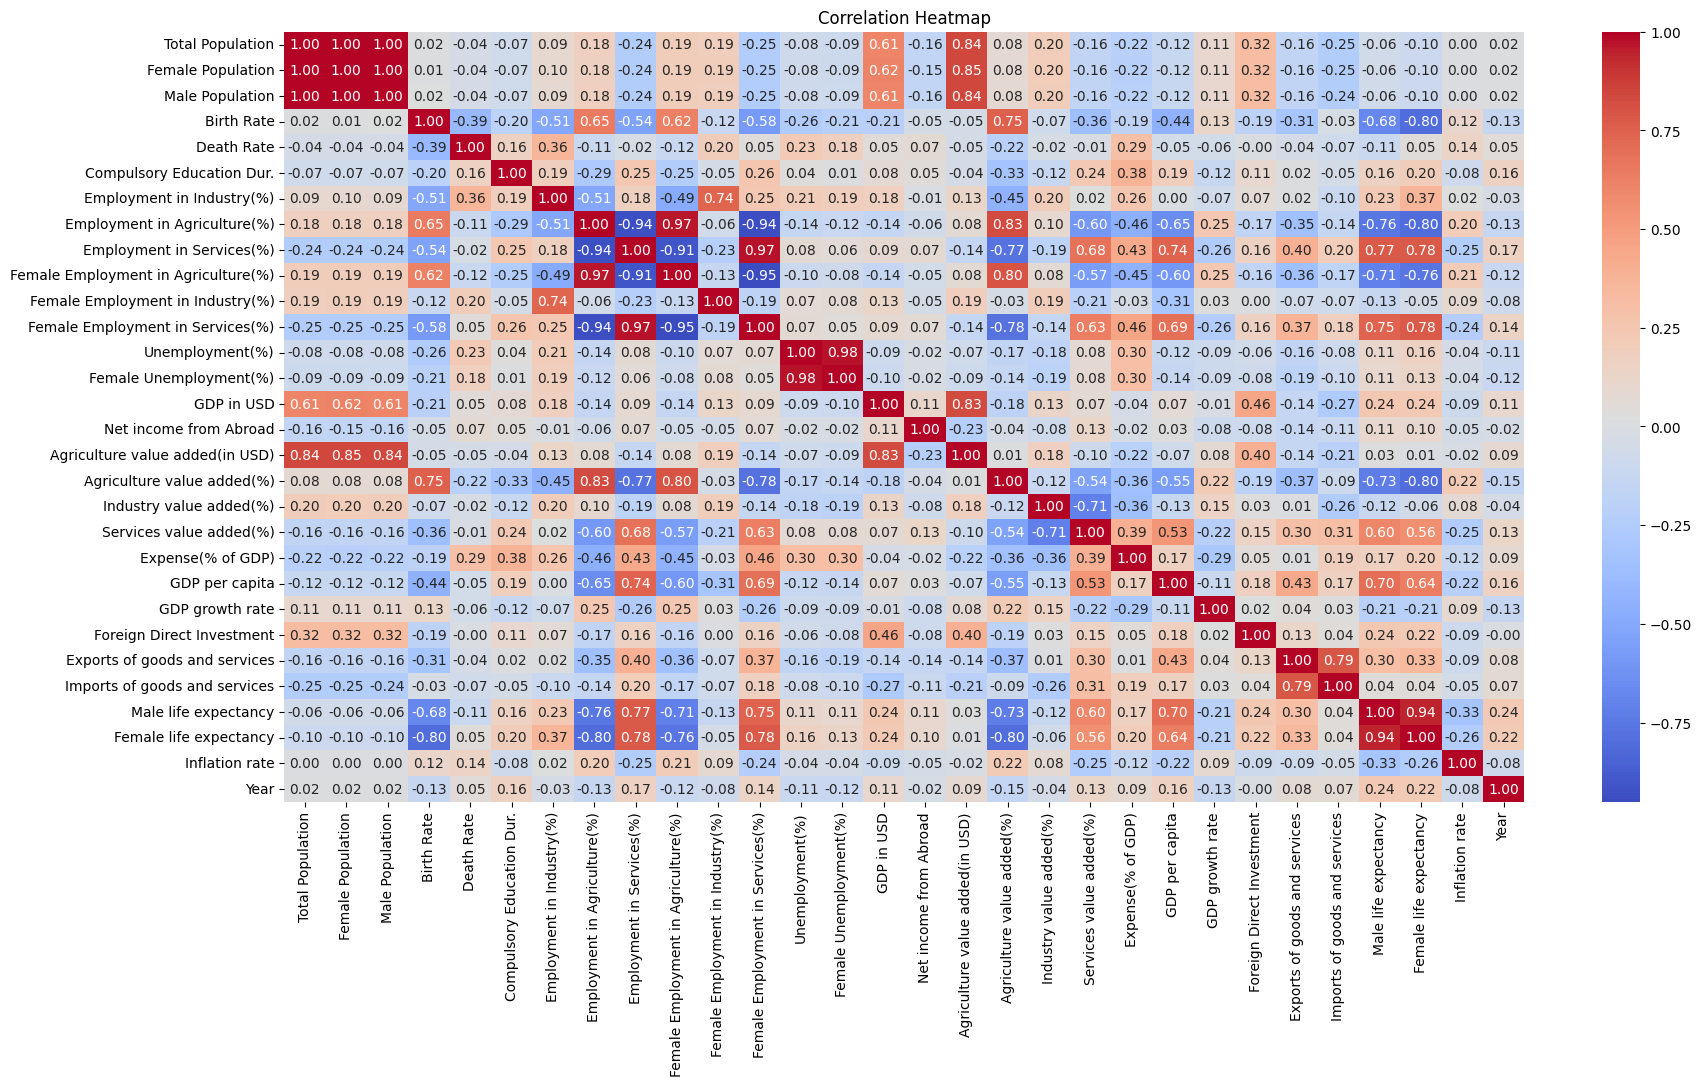

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()